In [2]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [3]:
df=pd.read_csv('dataset_augmented_all.csv')
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,atomic_number,radius_pm,oxid_state,relativistic,metal_amount_mmol,num of group,spcaer,...,aromaticity1,sol1_vol_mL,protic2,polarity index 2,aromaticity2,solv2_vol_mL,time_min,temp_c,size_nm,g_factor*10^4
0,0,0,0,0.90070,-0.626518,0.980887,0.900450,-0.454943,-0.280991,-0.526910,...,-0.070711,-0.124583,-0.537086,-0.793018,-0.240613,-0.523310,0.680663,-0.997007,3.060000,0.000000
1,1,1,1,0.90070,-0.626518,0.980887,0.900450,-0.454943,-0.280991,-0.526910,...,-0.070711,-0.104117,-0.537086,-0.793018,-0.240613,-0.523310,0.680663,-0.997007,1.000000,0.757989
2,2,2,2,-1.03686,-0.252283,-0.853143,-1.110555,1.601355,0.049297,-0.526910,...,-0.070711,-0.175747,-0.537086,-0.793018,-0.240613,-0.523310,-0.593509,-0.997007,1.000000,0.583069
3,3,3,3,-1.03686,-0.252283,-0.853143,-1.110555,1.768534,-0.280991,-0.526910,...,-0.070711,-0.032487,-0.537086,-0.793018,-0.240613,-0.523310,-0.593509,-0.997007,2.370000,0.000000
4,4,4,4,0.90070,-0.626518,0.980887,0.900450,-0.454943,0.049297,-0.526910,...,-0.070711,-0.124583,-0.537086,-0.793018,-0.240613,-0.523310,0.680663,-0.997007,4.000000,15.151515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,196,-1.03686,-0.252283,-0.853143,-1.110555,-0.265474,-0.115847,-0.742392,...,-0.070711,-0.605526,-0.537086,-0.793018,-0.240613,-0.523310,0.217328,-0.176375,2.066667,2.000000
197,197,197,197,-1.03686,-0.252283,-0.853143,-1.110555,0.570420,-0.115847,-0.526910,...,-0.070711,-0.175747,1.861899,1.679991,-0.240613,-0.004855,-0.535592,-0.176375,1.050000,15.000000
198,198,198,198,-1.03686,-0.252283,-0.853143,-1.110555,0.570420,-0.115847,-0.526910,...,-0.070711,-0.175747,1.861899,1.679991,-0.240613,-0.004855,-0.535592,-0.176375,1.300000,10.000000
199,199,199,199,-1.03686,-0.252283,-0.853143,-1.110555,0.570420,-0.115847,-0.526910,...,-0.070711,-0.175747,1.861899,1.679991,-0.240613,-0.004855,-0.535592,-0.176375,1.050000,7.000000


In [4]:
input_col=[col for col in df.columns]
input_col.remove('Unnamed: 0')
input_col.remove('Unnamed: 0.1')
input_col.remove('Unnamed: 0.2')
input_col.remove('g_factor*10^4')
input_col

['atomic_number',
 'radius_pm',
 'oxid_state',
 'relativistic',
 'metal_amount_mmol',
 'num of group',
 'spcaer',
 'anchoring_group',
 'chirality type',
 'hydrogen bond',
 'aromaticity',
 'ligand_amount_mmol',
 'redu_num',
 'reductant_amount_mmol',
 'protic1',
 'polarity index1',
 'aromaticity1',
 'sol1_vol_mL',
 'protic2',
 'polarity index 2',
 'aromaticity2',
 'solv2_vol_mL',
 'time_min',
 'temp_c',
 'size_nm']

In [5]:
X = df[input_col]

Y = df['g_factor*10^4']

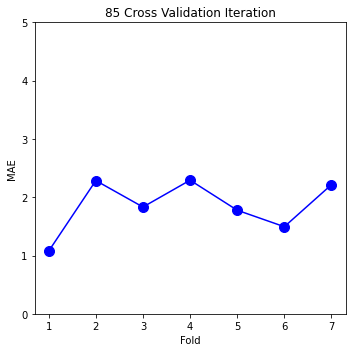

In [6]:
cv=5
fig,ax = plt.subplots(1, 1, figsize=(5,5))
n_splits=7
cv = KFold(n_splits=n_splits, random_state=3, shuffle=True)

#size
clf1=joblib.load('model_SO_ExtraTrees.joblib')
scores_size = cross_val_score(clf1, X, Y, cv=cv, scoring='neg_mean_absolute_error')
scores_size=-scores_size
ax.set(ylim=(0,5))
ax.plot(range(1,n_splits+1),scores_size,'bo-',markersize=10)
ax.set_title('85 Cross Validation Iteration')
ax.set(xlabel='Fold', ylabel='MAE')


fig.tight_layout()
fig.savefig('85kfold.svg',format='svg',dpi=300)